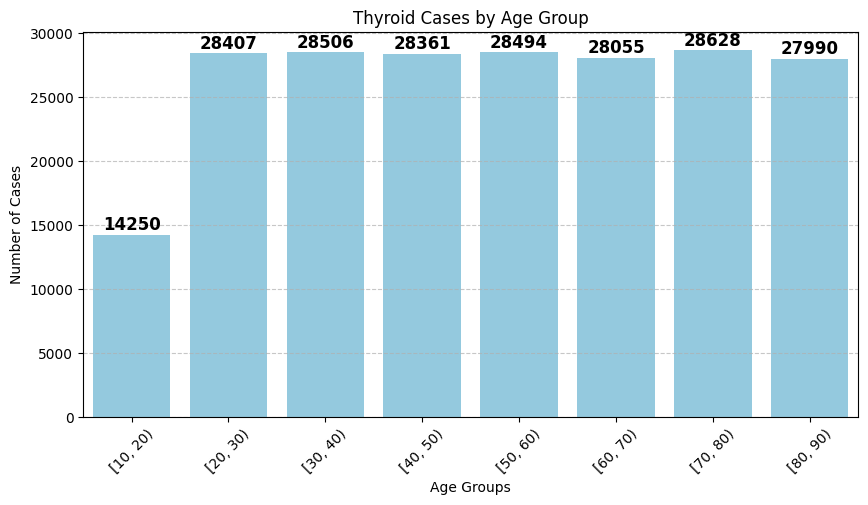

Gender
Female    127527
Male       85164
Name: Age, dtype: int64


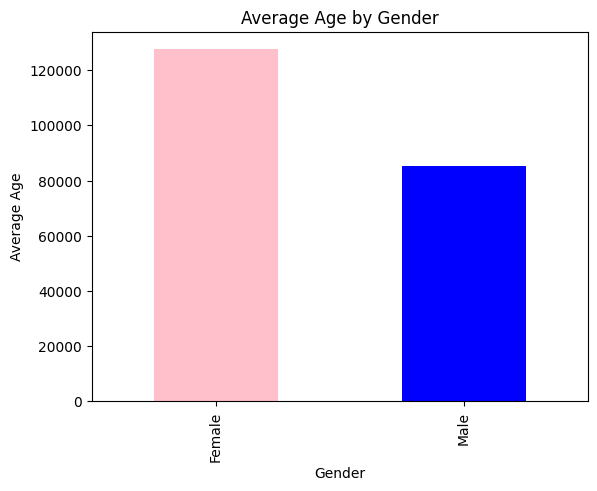

             TSH_Level  T3_Level  T4_Level
Country                                   
Brazil        5.077207  2.002007  8.234757
China         5.038507  2.001445  8.236263
Germany       5.037239  2.010469  8.236659
India         5.028469  1.994052  8.249983
Japan         5.074031  1.997515  8.247825
Nigeria       5.039133  2.012988  8.243642
Russia        5.044702  2.003400  8.260409
South Korea   5.032414  1.993940  8.264402
UK            5.060570  1.999825  8.247920
USA           5.049803  2.006424  8.242841
Country
India          42496
China          31978
Nigeria        31918
Brazil         21413
Russia         21297
Japan          16867
South Korea    14965
UK             10642
USA            10558
Germany        10557
Name: count, dtype: int64


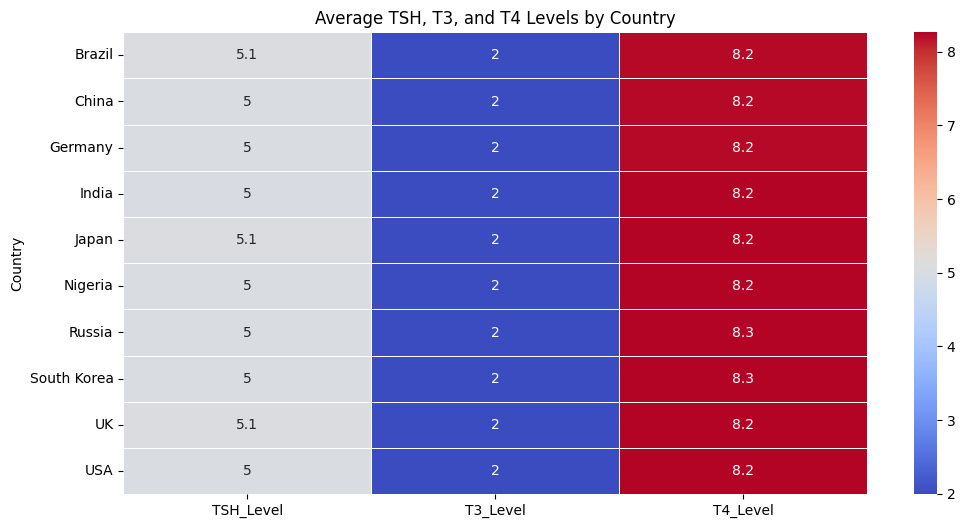

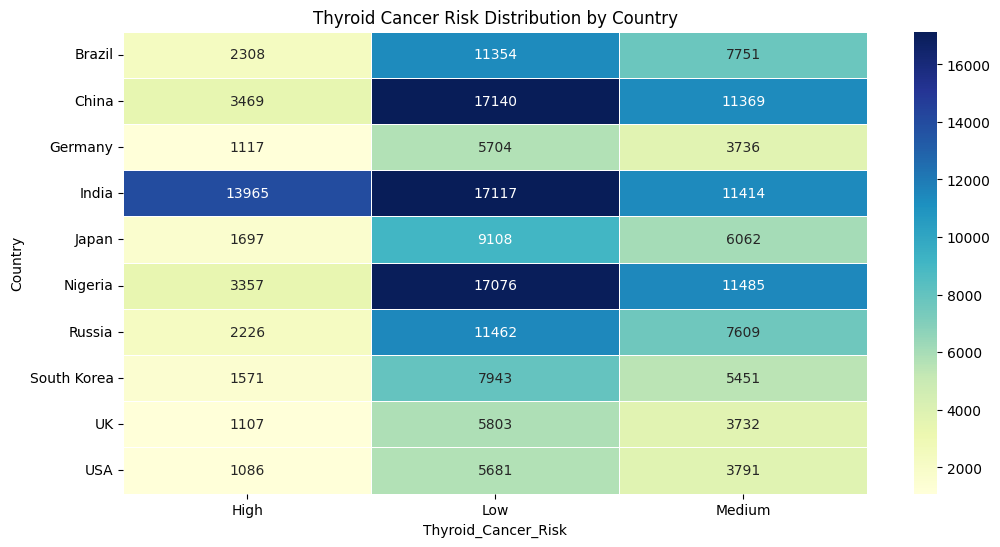

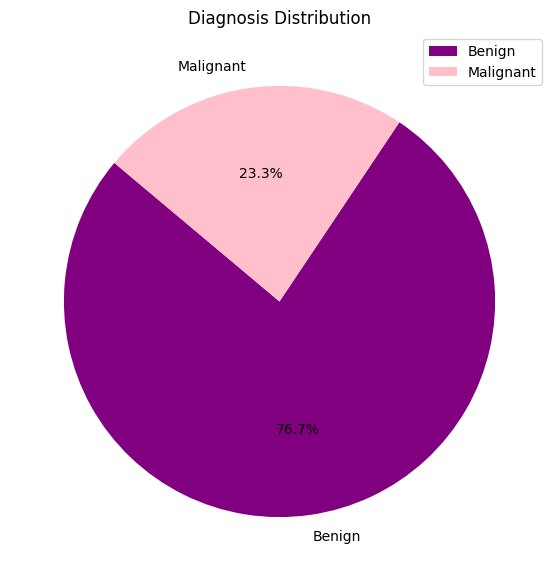

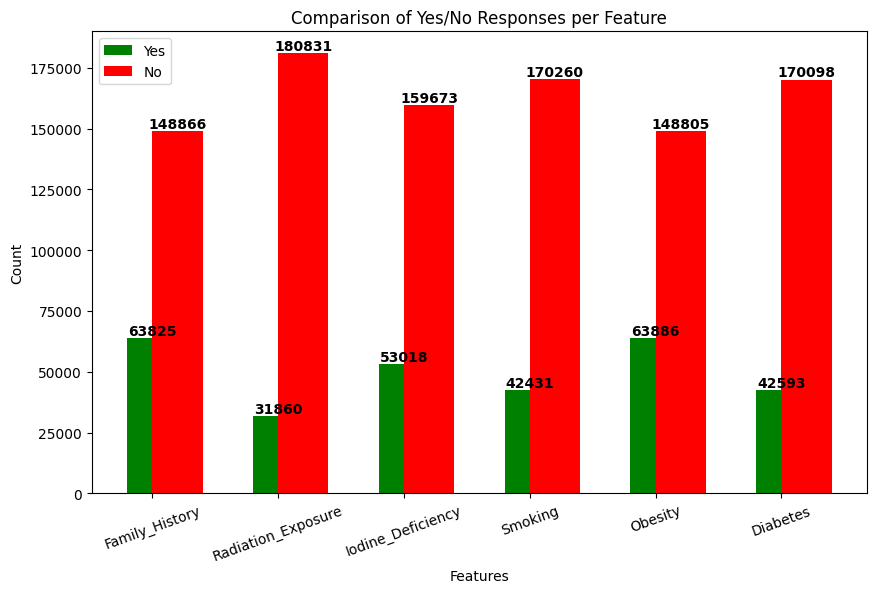

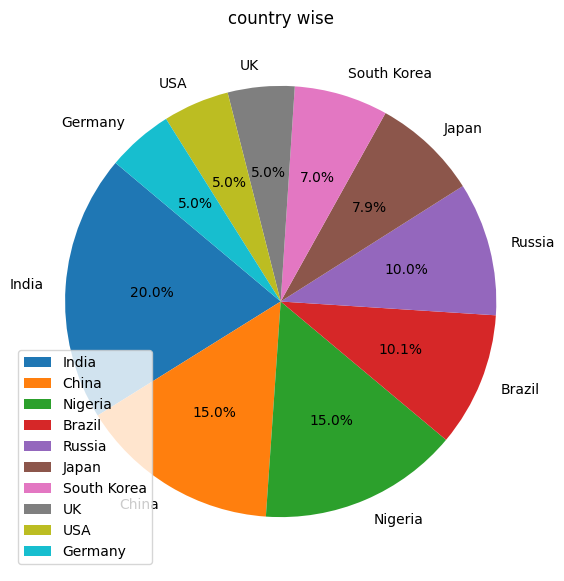

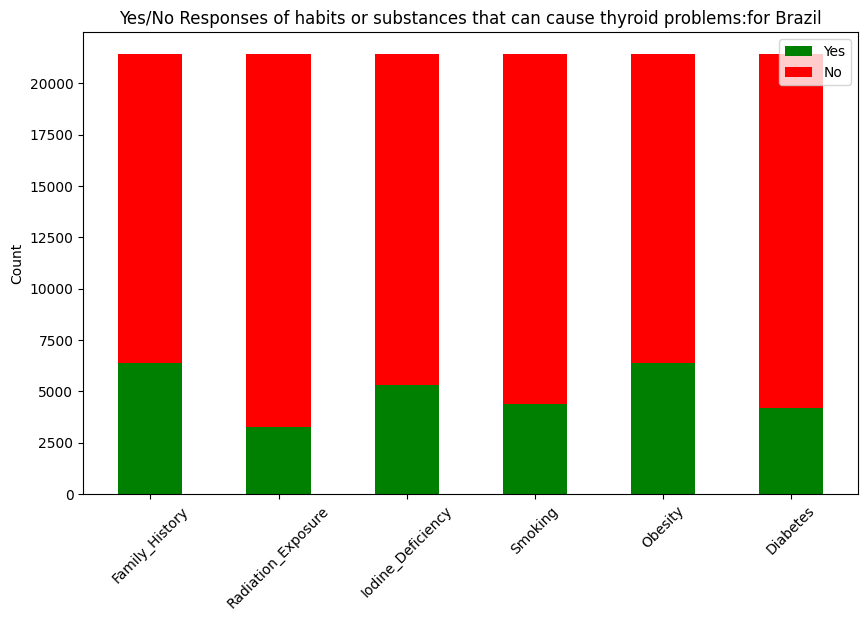

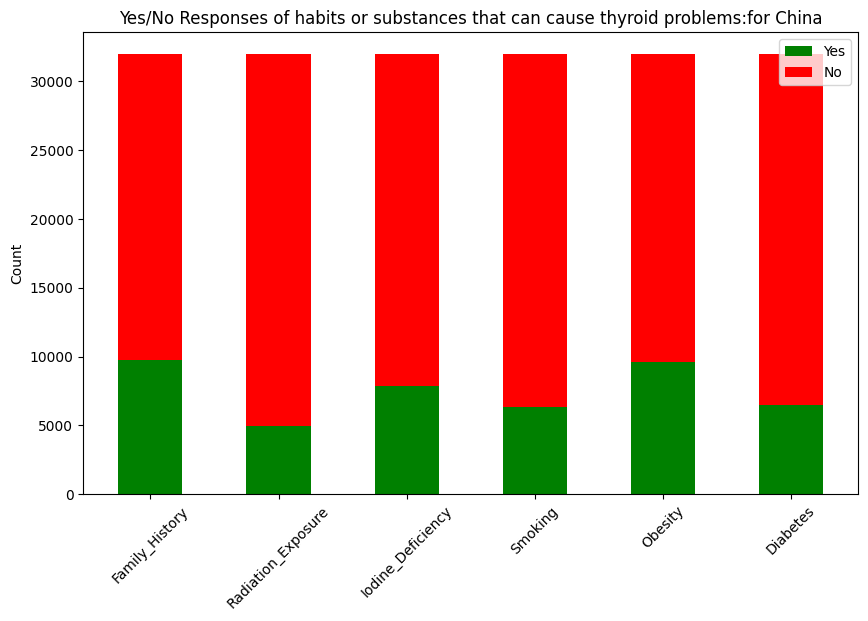

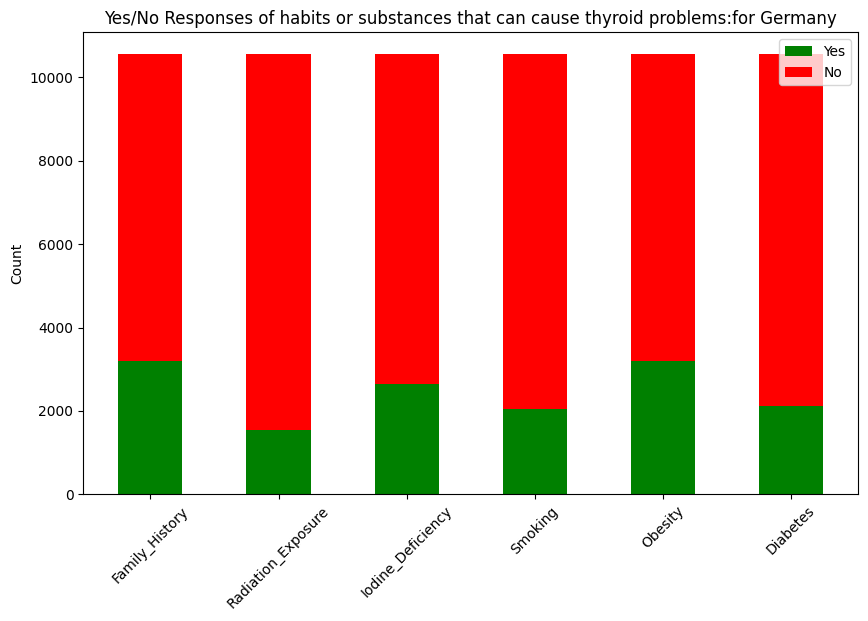

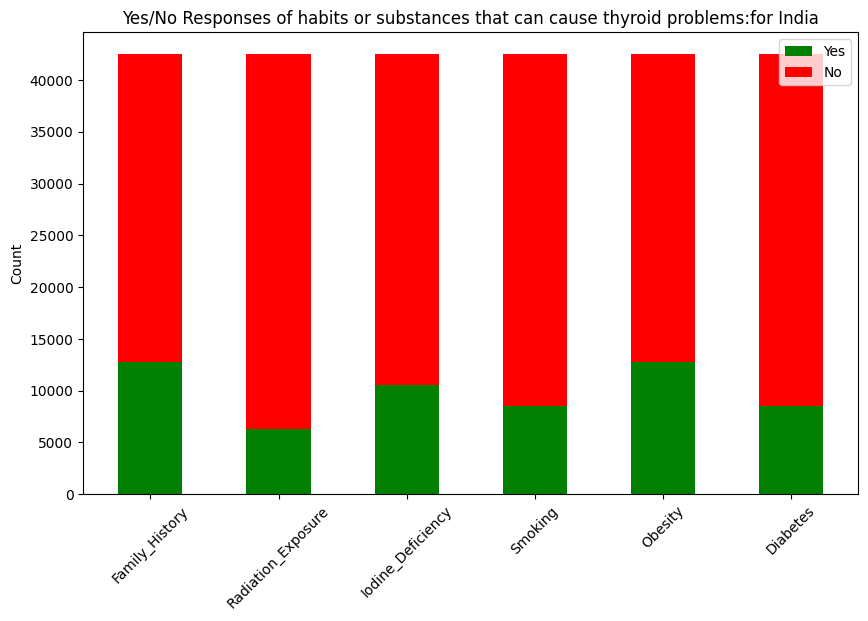

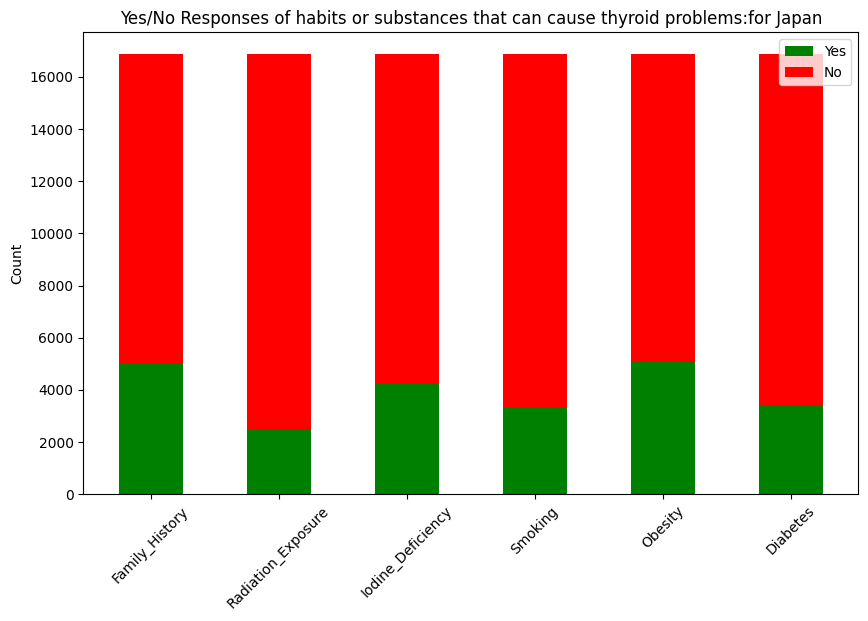

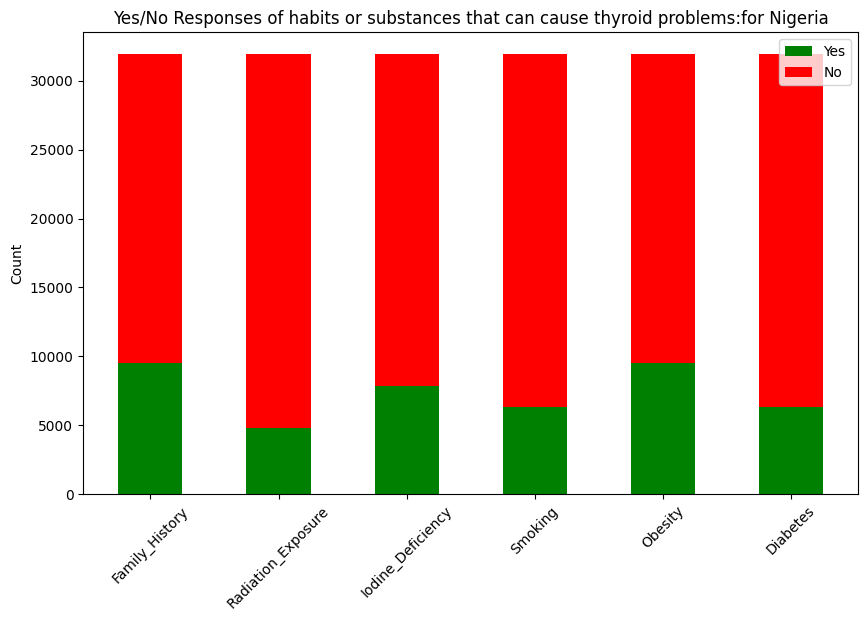

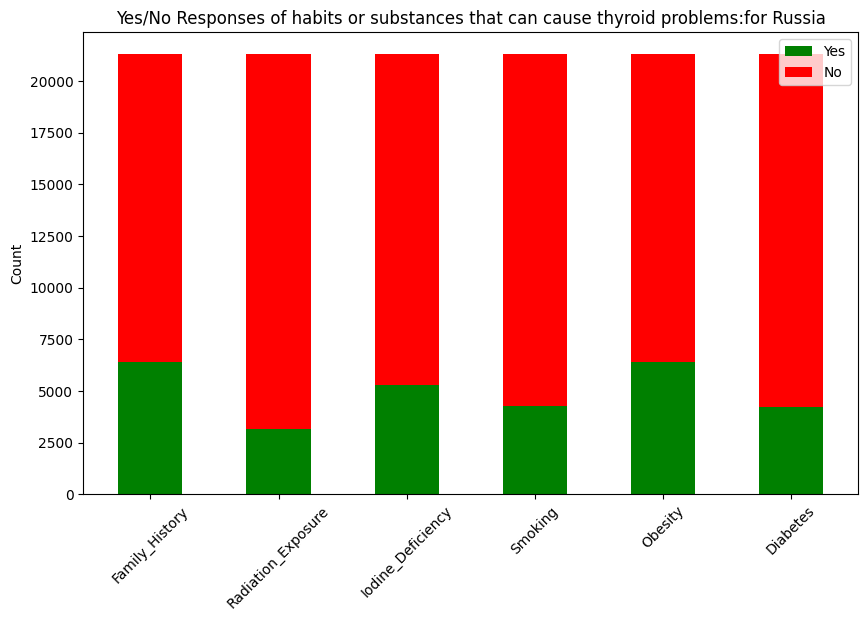

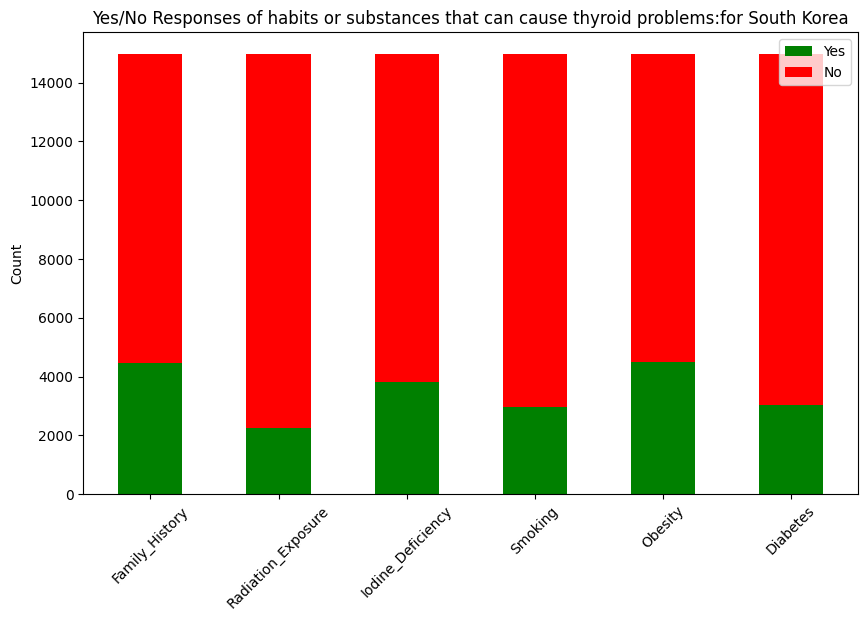

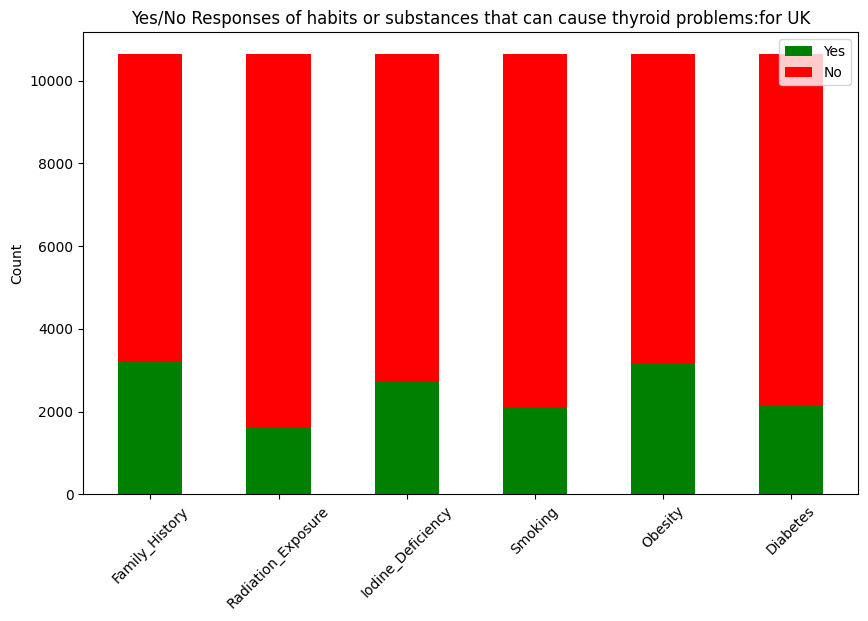

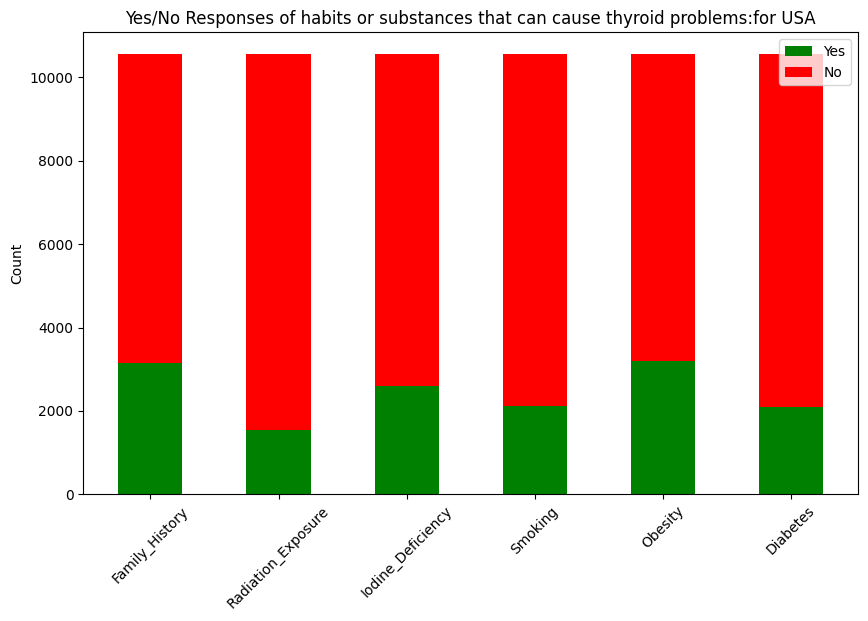

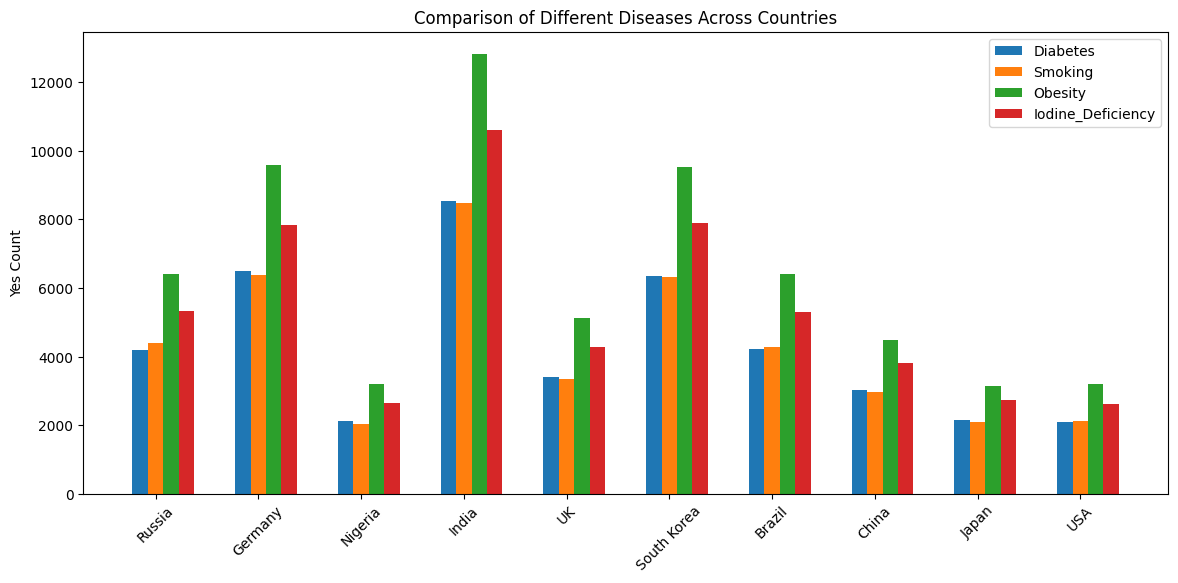

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('C:/Users/Admin/Desktop/thyroid_cancer_risk_data.csv')
#print(df.head())
#creating a bar plot that show age of people suffer from cancer (count of diff age peoples)
# Create age groups (bins)
# Create age groups (bins)
df['Age Group'] = pd.cut(df['Age'], bins=range(10, 100, 10), right=False)
# Count occurrences per age group
age_counts = df['Age Group'].value_counts().sort_index()
# Create the bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=age_counts.index.astype(str), y=age_counts.values, color="skyblue")
# Add labels inside bars
for i, value in enumerate(age_counts.values):
    ax.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize the plot
plt.xlabel("Age Groups")
plt.ylabel("Number of Cases")
plt.title("Thyroid Cases by Age Group")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()
# Show the plot
#create  a pie chart to to show the male and female cases of tyriod
grouped = df.groupby('Gender')['Age'].count()
print(grouped)

# Plotting the result
grouped.plot(kind='bar', color=['pink', 'blue'])
plt.title('Average Age by Gender')
plt.ylabel('Average Age')
plt.show()

#heatmap of city
# Group by country and calculate the mean of TSH, T3, T4 levels
groupedcity = df.groupby("Country")[["TSH_Level", "T3_Level", "T4_Level"]].mean()
print(groupedcity)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(groupedcity, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Average TSH, T3, and T4 Levels by Country")


# Create a pivot table of counts for each risk level per country
risk_heatmap = df.pivot_table(index="Country", columns="Thyroid_Cancer_Risk", aggfunc="size", fill_value=0)
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(risk_heatmap, cmap="YlGnBu", annot=True, linewidths=0.5, fmt="d")
plt.title("Thyroid Cancer Risk Distribution by Country")

# Step 2: Count occurrences of each category
category_counts = df["Diagnosis"].value_counts()

# Step 3: Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", startangle=140, colors=[  'purple','pink'])
plt.legend()
plt.title("Diagnosis Distribution")


#show differnet columns value (yes or no)
# Step 2: Select only relevant Yes/No columns
yes_no_columns = ["Family_History", "Radiation_Exposure", "Iodine_Deficiency", "Smoking", "Obesity", "Diabetes"]
df_filtered = df[yes_no_columns]  # Keep only Yes/No columns

# Step 3: Count occurrences of 'Yes' and 'No' for each column
yes_counts = (df_filtered == 'Yes').sum()  # Count 'Yes' for each column
no_counts = (df_filtered == 'No').sum()    # Count 'No' for each column

# Step 4: Create the bar chart
x_labels = yes_no_columns  # Column names for x-axis
#y_labels=df["country"]
x = range(len(x_labels))  # X positions for bars

plt.figure(figsize=(10, 6))

# Plot Yes and No counts as bars
bars_yes = plt.bar(x, yes_counts, width=0.4, label="Yes", color="green", align='center')
bars_no = plt.bar(x, no_counts, width=0.4, label="No", color="red", align='edge')

# Step 5: Add labels (numbers) above bars
for bar in bars_yes:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars_no:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Step 5: Label the chart
plt.xlabel("Features")
plt.ylabel("Count")
plt.title("Comparison of Yes/No Responses per Feature")
plt.xticks(x, x_labels, rotation=20)  # Rotate labels for better readability
plt.legend()



#pie chart of a country
country_count=df['Country'].value_counts()
print(country_count)
plt.figure(figsize=(7, 7))
plt.pie(country_count, labels=country_count.index, autopct="%1.1f%%", startangle=140)
plt.title("country wise")
plt.legend()  # Change location here


# Define Yes/No columns
yes_no_columns = ["Family_History", "Radiation_Exposure", "Iodine_Deficiency", "Smoking", "Obesity", "Diabetes"]

# Count 'Yes' and 'No' responses per country
yes_counts = df.groupby("Country")[yes_no_columns].apply(lambda x: (x == "Yes").sum())
no_counts = df.groupby("Country")[yes_no_columns].apply(lambda x: (x == "No").sum())

# Get unique countries
countries = yes_counts.index  
x_labels = yes_no_columns  
x = np.arange(len(x_labels))  # X positions for bars
width = 0.5  # Bar width

# Create stacked bar chart for each country
for i, country in enumerate(countries):
    plt.figure(figsize=(10, 6))
    
    # Stacked Bar: Yes and No responses for each disease
    plt.bar(x, yes_counts.loc[country], width, label="Yes", color="green")
    plt.bar(x, no_counts.loc[country], width, bottom=yes_counts.loc[country], label="No", color="red")
    
    # Formatting
    plt.xticks(ticks=x, labels=x_labels, rotation=45)
    plt.ylabel("Count")
    plt.title(f"Yes/No Responses of habits or substances that can cause thyroid problems:for {country}")
    plt.legend()
    
    # Display the plot
    plt.show()


# Select the disease to analyze (Change this to any disease column)
# Select multiple diseases
disease_columns = ["Diabetes", "Smoking", "Obesity", "Iodine_Deficiency"]  # Add more if needed

# Get unique countries
countries = df["Country"].unique()
x = np.arange(len(countries))  # X positions for bars
width = 0.15  # Adjust bar width based on the number of diseases

plt.figure(figsize=(14, 6))
# Loop through diseases and plot them
for i, disease in enumerate(disease_columns):
    yes_counts = df.groupby("Country")[disease].apply(lambda x: (x == "Yes").sum())
    plt.bar(x + i * width, yes_counts, width=width, label=disease)

# Formatting
plt.xticks(ticks=x + width, labels=countries, rotation=45)
plt.ylabel("Yes Count")
plt.title("Comparison of Different Diseases Across Countries")
plt.legend()
plt.show()
